# Handwritten classification using ANN

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 23s 2us/step


In [3]:
# Normalize the pixel values between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

In [4]:
# Define the ANN model architecture
model = keras.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)),  # Convert the 28x28 image into a 784-dimensional vector (image flattening)
  keras.layers.Dense(128, activation='relu'),  # Hidden layer with 128 units and ReLU activation
  keras.layers.Dense(10, activation='softmax')  # Output layer with 10 units and softmax activation for multiclass classification
])

In [5]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [6]:
# Train the model on the training set for 5 epochs
history=model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2609 - accuracy: 0.9249 - val_loss: 0.1318 - val_accuracy: 0.9609
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1149 - accuracy: 0.9667 - val_loss: 0.1037 - val_accuracy: 0.9677
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0787 - accuracy: 0.9768 - val_loss: 0.0845 - val_accuracy: 0.9752
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0582 - accuracy: 0.9827 - val_loss: 0.0828 - val_accuracy: 0.9759
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0452 - accuracy: 0.9863 - val_loss: 0.0775 - val_accuracy: 0.9762


In [7]:
# Predict the labels of the test set
import numpy as np
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)


313/313 [==============================] - 0s 759us/step


In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
# Print the confusion matrix
print('Confusion Matrix:')
print(cm)
# Calculate the accuracy
acc = accuracy_score(y_test, y_pred)

# Print the accuracy
print('Accuracy:', acc)

Confusion Matrix:
[[ 972    0    0    2    0    0    2    1    3    0]
 [   0 1124    3    1    0    1    1    0    5    0]
 [   2    1 1010    2    1    0    3    8    5    0]
 [   0    1    8  986    0    6    0    3    6    0]
 [   0    0    7    0  953    0    4    3    2   13]
 [   2    1    0    7    1  875    2    1    2    1]
 [   6    3    2    1    2    8  931    0    5    0]
 [   1    7   10    3    2    1    0  996    3    5]
 [   3    0    2    4    4    6    1    3  948    3]
 [   3    6    0    7   11    3    0    4    8  967]]
Accuracy: 0.9762


# Plotting 

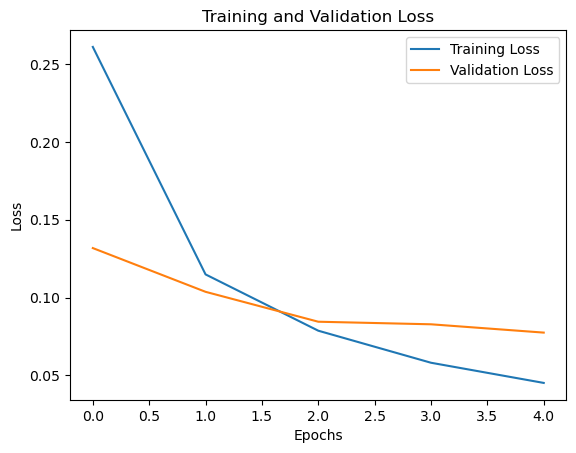

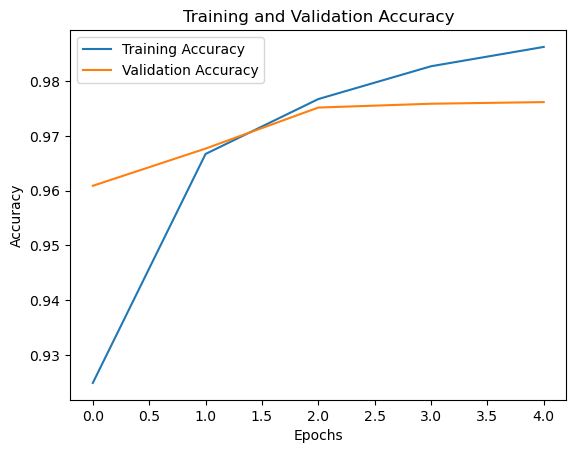

In [9]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



# Handwritten digit classification using CNN

In [10]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [11]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [12]:
# Normalize the pixel values between 0 and 1 and add a channel dimension to the images
x_train = x_train.astype('float32') / 255.0
x_train = np.expand_dims(x_train, axis=-1)
x_test = x_test.astype('float32') / 255.0
x_test = np.expand_dims(x_test, axis=-1)

In [13]:
# Define the CNN model architecture
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [14]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
# Train the model on the training set for 5 epochs and validate on the test set
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1349 - accuracy: 0.9587 - val_loss: 0.0428 - val_accuracy: 0.9858
Epoch 2/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0438 - accuracy: 0.9859 - val_loss: 0.0422 - val_accuracy: 0.9867
Epoch 3/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0310 - accuracy: 0.9898 - val_loss: 0.0372 - val_accuracy: 0.9875
Epoch 4/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0219 - accuracy: 0.9926 - val_loss: 0.0366 - val_accuracy: 0.9880
Epoch 5/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0164 - accuracy: 0.9945 - val_loss: 0.0340 - val_accuracy: 0.9890


In [16]:
# Predict the labels of the test set
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

313/313 [==============================] - 1s 3ms/step


In [17]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print('Confusion Matrix:')
print(cm)

# Calculate the accuracy
acc = accuracy_score(y_test, y_pred)

# Print the accuracy
print('Accuracy:', acc)

Confusion Matrix:
[[ 974    0    1    0    1    0    1    1    1    1]
 [   0 1134    0    0    0    0    1    0    0    0]
 [   0    3 1026    0    0    0    1    2    0    0]
 [   0    0    1  998    0    5    0    1    4    1]
 [   0    0    0    0  967    0    0    0    6    9]
 [   0    0    1    3    0  886    1    0    1    0]
 [   4    2    0    0    3    1  946    0    2    0]
 [   0    3    8    0    0    0    0 1010    5    2]
 [   3    0    1    1    0    1    0    0  966    2]
 [   1    3    1    0    2    3    0    4   12  983]]
Accuracy: 0.989


# Plotting 

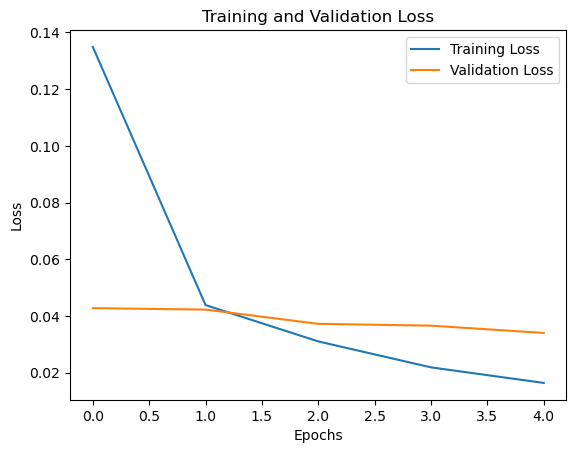

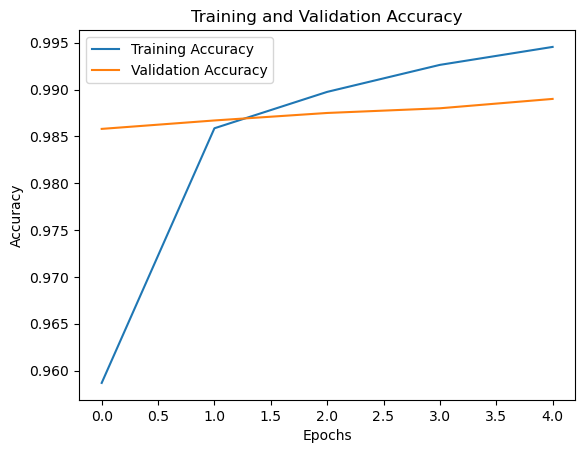

In [18]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()